In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
blazor_testing = '#3a0647'
blazor_helloworld = '#0b2464'

angular_helloworld = '#860009'
angular_testing = '#4a0637'

In [3]:
file_path = 'bundle-size-build-compilation-time.csv'
df = pd.read_csv(file_path, delimiter=';')

In [4]:
print(df)

               Framework Bundle Size (MB)  Build/Compilation Time (ms)
0  Angular (Hello World)            0,226                         3032
1   Blazor (Hello World)             13,7                         2834
2      Angular (Testing)            0,602                         4393
3       Blazor (Testing)               17                         5136


In [5]:
df['Bundle Size (MB)'] = df['Bundle Size (MB)'].str.replace(',', '.').astype(float)

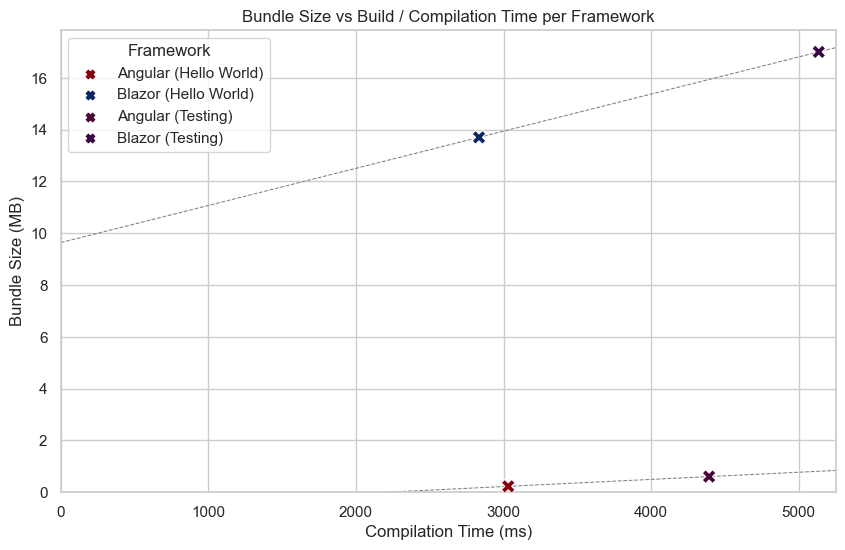

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

palette = {
    'Angular (Hello World)': angular_helloworld, 
    'Angular (Testing)': angular_testing, 
    'Blazor (Hello World)': blazor_helloworld, 
    'Blazor (Testing)': blazor_testing
}

markers = {
    'Angular (Hello World)': 'X', 
    'Angular (Testing)': 'X', 
    'Blazor (Hello World)': 'X', 
    'Blazor (Testing)': 'X'
}

sns.scatterplot(data=df, x='Build/Compilation Time (ms)', y='Bundle Size (MB)', hue='Framework', style='Framework', markers=markers, s=100, palette=palette, legend='full', zorder=3)

plt.title('Bundle Size vs Build / Compilation Time per Framework')
plt.xlabel('Compilation Time (ms)')
plt.ylabel('Bundle Size (MB)')
plt.legend(title='Framework')

plt.xlim(left=0)
plt.ylim(bottom=0)

x_start = 0
x_end = df['Build/Compilation Time (ms)'].max() + 5000

ahw = df[df['Framework'] == 'Angular (Hello World)'][['Build/Compilation Time (ms)', 'Bundle Size (MB)']].iloc[0]
at = df[df['Framework'] == 'Angular (Testing)'][['Build/Compilation Time (ms)', 'Bundle Size (MB)']].iloc[0]
m_angular = (at['Bundle Size (MB)'] - ahw['Bundle Size (MB)']) / (at['Build/Compilation Time (ms)'] - ahw['Build/Compilation Time (ms)'])
b_angular = ahw['Bundle Size (MB)'] - m_angular * ahw['Build/Compilation Time (ms)']
y_start_angular = m_angular * x_start + b_angular
y_end_angular = m_angular * x_end + b_angular
plt.plot([x_start, x_end], [y_start_angular, y_end_angular], linestyle='--', color='gray', linewidth=0.75, zorder=2)

bhw = df[df['Framework'] == 'Blazor (Hello World)'][['Build/Compilation Time (ms)', 'Bundle Size (MB)']].iloc[0]
bt = df[df['Framework'] == 'Blazor (Testing)'][['Build/Compilation Time (ms)', 'Bundle Size (MB)']].iloc[0]
m_blazor = (bt['Bundle Size (MB)'] - bhw['Bundle Size (MB)']) / (bt['Build/Compilation Time (ms)'] - bhw['Build/Compilation Time (ms)'])
b_blazor = bhw['Bundle Size (MB)'] - m_blazor * bhw['Build/Compilation Time (ms)']
y_start_blazor = m_blazor * x_start + b_blazor
y_end_blazor = m_blazor * x_end + b_blazor
plt.plot([x_start, x_end], [y_start_blazor, y_end_blazor], linestyle='--', color='gray', linewidth=0.75, zorder=2)

plt.show()

In [7]:
angular_path = 'angular.csv'
df_angular = pd.read_csv(angular_path, delimiter=';')

In [8]:
display(df_angular)

,Table,Loading-time (ms),Scripting-time (ms),Rendering-time (ms),Painting-time (ms),System-time (ms),Memory usage (MB),Memory usage (bytes),Gemiddelde FPS
0,Basic 100,4,173,97,26,56,"16,1",16 071 252,144
1,Basic 1K,6,742,630,45,97,"59,2",59 238 416,102
2,Basic 10K,6,5971,5646,124,214,886,885 625 588,28
3,Advanced 100,5,199,119,36,74,"16,4",16 423 008,144
4,Advanced 1K,6,797,673,49,106,"60,4",60 394 212,139
5,Advanced 10K,5,5759,5563,130,214,904,903 896 340,136


In [9]:
df_angular['Memory usage (MB)'] = df_angular['Memory usage (MB)'].replace(',', '.', regex=True).astype(float)

df_angular['Loading-time (ms)'] = df_angular['Loading-time (ms)'] / 10
df_angular['Scripting-time (ms)'] = df_angular['Scripting-time (ms)'] / 10
df_angular['Rendering-time (ms)'] = df_angular['Rendering-time (ms)'] / 10
df_angular['Painting-time (ms)'] = df_angular['Painting-time (ms)'] / 10
df_angular['System-time (ms)'] = df_angular['System-time (ms)'] / 10

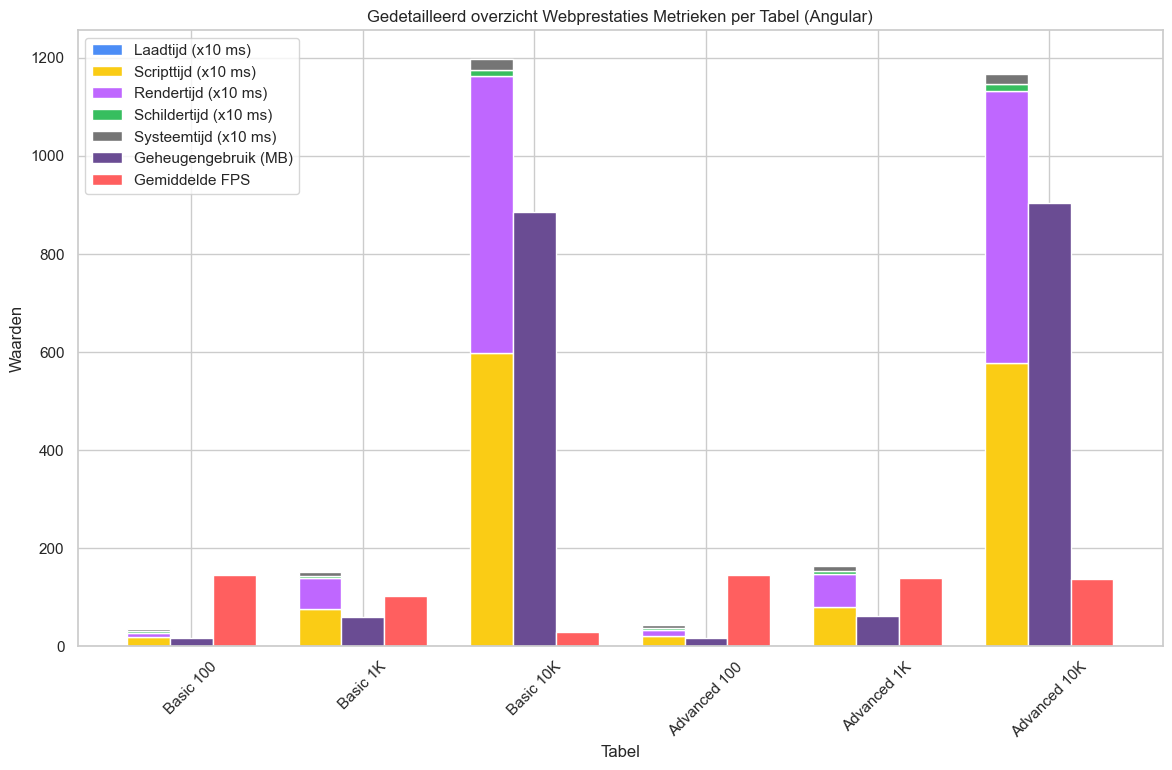

In [10]:
sns.set(style="whitegrid")

data = {
    'Table': df_angular['Table'],
    'Loading-time': df_angular['Loading-time (ms)'],
    'Scripting-time': df_angular['Scripting-time (ms)'],
    'Rendering-time': df_angular['Rendering-time (ms)'],
    'Painting-time': df_angular['Painting-time (ms)'],
    'System-time': df_angular['System-time (ms)'],
    'Memory usage (MB)': df_angular['Memory usage (MB)'],
    'Gemiddelde FPS': df_angular['Gemiddelde FPS']
}

df = pd.DataFrame(data)

plt.figure(figsize=(14, 8))
bar_width = 0.25 
x = np.arange(len(df['Table'])) 

translations = {
    'Loading-time': 'Laadtijd (x10 ms)',
    'Scripting-time': 'Scripttijd (x10 ms)',
    'Rendering-time': 'Rendertijd (x10 ms)',
    'Painting-time': 'Schildertijd (x10 ms)',
    'System-time': 'Systeemtijd (x10 ms)',
    'Memory usage (MB)': 'Geheugengebruik (MB)',
    'Gemiddelde FPS': 'Gemiddelde FPS',
    'Table': 'Tabel',
    'Values': 'Waarden',
    'Detailed Web Performance Metrics Across Different Tables': 'Gedetailleerd overzicht Webprestaties Metrieken per Tabel (Angular)'
}

colors = {
    'Loading-time': '#4c8df6',
    'Scripting-time': '#facc15',
    'Rendering-time': '#bf67ff',
    'Painting-time': '#37be5f',
    'System-time': '#757575',
    'Memory usage (MB)': '#6a4c93',
    'Gemiddelde FPS': '#ff5f5f'
}

plt.bar(x - bar_width, df['Loading-time'], width=bar_width, label=translations['Loading-time'], color=colors['Loading-time'])
plt.bar(x - bar_width, df['Scripting-time'], bottom=df['Loading-time'], width=bar_width, label=translations['Scripting-time'], color=colors['Scripting-time'])
plt.bar(x - bar_width, df['Rendering-time'], bottom=df['Loading-time'] + df['Scripting-time'], width=bar_width, label=translations['Rendering-time'], color=colors['Rendering-time'])
plt.bar(x - bar_width, df['Painting-time'], bottom=df['Loading-time'] + df['Scripting-time'] + df['Rendering-time'], width=bar_width, label=translations['Painting-time'], color=colors['Painting-time'])
plt.bar(x - bar_width, df['System-time'], bottom=df['Loading-time'] + df['Scripting-time'] + df['Rendering-time'] + df['Painting-time'], width=bar_width, label=translations['System-time'], color=colors['System-time'])

plt.bar(x, df['Memory usage (MB)'], width=bar_width, label=translations['Memory usage (MB)'], color=colors['Memory usage (MB)'])
plt.bar(x + bar_width, df['Gemiddelde FPS'], width=bar_width, label=translations['Gemiddelde FPS'], color=colors['Gemiddelde FPS'])

plt.xlabel(translations['Table'])
plt.ylabel(translations['Values'])
plt.title(translations['Detailed Web Performance Metrics Across Different Tables'])
plt.xticks(x, df['Table'], rotation=45)
plt.legend()

plt.show()

In [11]:
blazor_path = 'blazor.csv'
df_blazor = pd.read_csv(blazor_path, delimiter=';')

In [12]:
display(df_blazor)

,Table,Loading-time (ms),Scripting-time (ms),Rendering-time (ms),Painting-time (ms),System-time (ms),Memory usage (MB),Memory usage (bytes),Gemiddelde FPS
0,Basic 100,118,985,281,34,89,"14,1",14088958,144
1,Basic 1K,1810,4071,2355,112,266,157,157217184,79
2,Basic 10K,585,3852,23951,2159,2682,381,380953308,10
3,Advanced 100,28,4265,35,6,381,330,330046448,144
4,Advanced 1K,28,2963,34,5,84,"77,4",77407636,144
5,Advanced 10K,29,7089,32,6,91,"79,9",79927804,139


In [13]:
df_blazor['Memory usage (MB)'] = df_blazor['Memory usage (MB)'].replace(',', '.', regex=True).astype(float)

df_blazor['Loading-time (ms)'] = df_blazor['Loading-time (ms)'] / 10
df_blazor['Scripting-time (ms)'] = df_blazor['Scripting-time (ms)'] / 10
df_blazor['Rendering-time (ms)'] = df_blazor['Rendering-time (ms)'] / 10
df_blazor['Painting-time (ms)'] = df_blazor['Painting-time (ms)'] / 10
df_blazor['System-time (ms)'] = df_blazor['System-time (ms)'] / 10

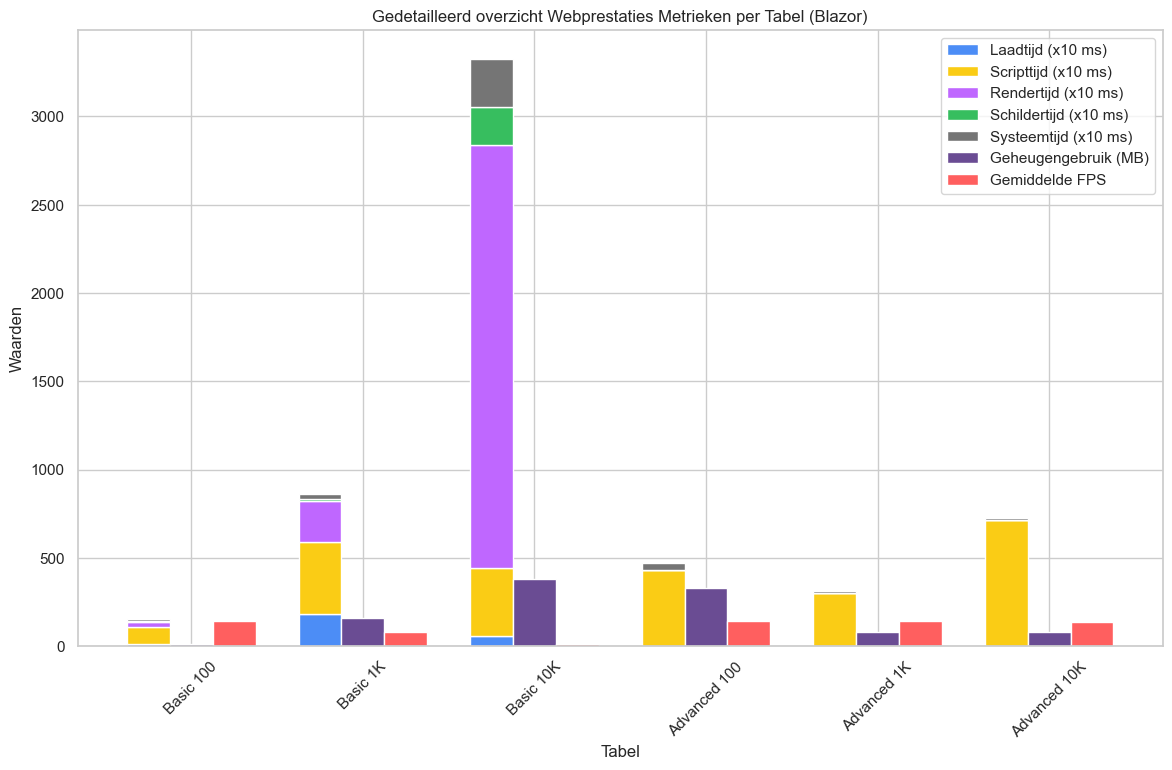

In [15]:
sns.set(style="whitegrid")

data = {
    'Table': df_blazor['Table'],
    'Loading-time': df_blazor['Loading-time (ms)'],
    'Scripting-time': df_blazor['Scripting-time (ms)'],
    'Rendering-time': df_blazor['Rendering-time (ms)'],
    'Painting-time': df_blazor['Painting-time (ms)'],
    'System-time': df_blazor['System-time (ms)'],
    'Memory usage (MB)': df_blazor['Memory usage (MB)'],
    'Gemiddelde FPS': df_blazor['Gemiddelde FPS']
}

df = pd.DataFrame(data)

plt.figure(figsize=(14, 8))
bar_width = 0.25 
x = np.arange(len(df['Table'])) 

translations = {
    'Loading-time': 'Laadtijd (x10 ms)',
    'Scripting-time': 'Scripttijd (x10 ms)',
    'Rendering-time': 'Rendertijd (x10 ms)',
    'Painting-time': 'Schildertijd (x10 ms)',
    'System-time': 'Systeemtijd (x10 ms)',
    'Memory usage (MB)': 'Geheugengebruik (MB)',
    'Gemiddelde FPS': 'Gemiddelde FPS',
    'Table': 'Tabel',
    'Values': 'Waarden',
    'Detailed Web Performance Metrics Across Different Tables': 'Gedetailleerd overzicht Webprestaties Metrieken per Tabel (Blazor)'
}

colors = {
    'Loading-time': '#4c8df6',
    'Scripting-time': '#facc15',
    'Rendering-time': '#bf67ff',
    'Painting-time': '#37be5f',
    'System-time': '#757575',
    'Memory usage (MB)': '#6a4c93',
    'Gemiddelde FPS': '#ff5f5f'
}

plt.bar(x - bar_width, df['Loading-time'], width=bar_width, label=translations['Loading-time'], color=colors['Loading-time'])
plt.bar(x - bar_width, df['Scripting-time'], bottom=df['Loading-time'], width=bar_width, label=translations['Scripting-time'], color=colors['Scripting-time'])
plt.bar(x - bar_width, df['Rendering-time'], bottom=df['Loading-time'] + df['Scripting-time'], width=bar_width, label=translations['Rendering-time'], color=colors['Rendering-time'])
plt.bar(x - bar_width, df['Painting-time'], bottom=df['Loading-time'] + df['Scripting-time'] + df['Rendering-time'], width=bar_width, label=translations['Painting-time'], color=colors['Painting-time'])
plt.bar(x - bar_width, df['System-time'], bottom=df['Loading-time'] + df['Scripting-time'] + df['Rendering-time'] + df['Painting-time'], width=bar_width, label=translations['System-time'], color=colors['System-time'])

plt.bar(x, df['Memory usage (MB)'], width=bar_width, label=translations['Memory usage (MB)'], color=colors['Memory usage (MB)'])
plt.bar(x + bar_width, df['Gemiddelde FPS'], width=bar_width, label=translations['Gemiddelde FPS'], color=colors['Gemiddelde FPS'])

plt.xlabel(translations['Table'])
plt.ylabel(translations['Values'])
plt.title(translations['Detailed Web Performance Metrics Across Different Tables'])
plt.xticks(x, df['Table'], rotation=45)
plt.legend()

plt.show()